# Workshop 9: Convolutional Neural Network
## 1. Gradient Descent for MLP

In [195]:
import numpy as np
from matplotlib import pyplot as plt

data_2D = np.array([[1,0,0], #0
                    [1,1,0], #1
                    [1,0,1], #1
                    [1,1,1]])#0
y = np.array([0,1,1,0])

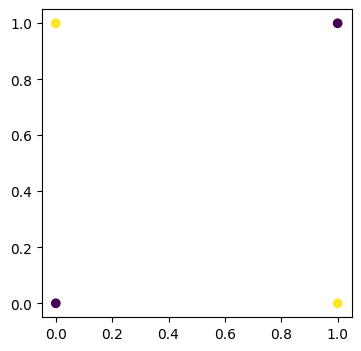

In [196]:

plt.figure(figsize=[4,4])

plt.scatter(data_2D[:,1],data_2D[:,2],c = y)
plt.show()

In [197]:
theta_1 = np.array([[1.0,0.0],
                    [1.0,0.0],
                    [1.0,0.0]])
theta_2 = np.array([[1.0,0.0],
                    [0.0,0.0]])
y = y.reshape(-1,1)

In [198]:
def sigmoid(data, theta):
    return 1/(1+np.exp(-1*(data@theta)))

In [199]:
alpha = 0.01
epoches = 50000

for itr in range(epoches):
    h_1 = sigmoid (data_2D,theta_1)
    h_2 = sigmoid(h_1,theta_2)

    theta_2 -= alpha * h_1.T @(h_2-y)
    theta_1 -= alpha * data_2D.T @(((h_2 - y)@theta_2.T)*h_1*(1-h_1))


h_1 = sigmoid (data_2D,theta_1)
h_2 = sigmoid(h_1,theta_2)

h_2


array([[0.04328607, 0.04340658],
       [0.9775699 , 0.97749794],
       [0.9775699 , 0.97749794],
       [0.0352768 , 0.03539171]])

## 2. Convolutional Neural Network
### 2.1 Importing the image

In [200]:
import cv2

### 2.2 Padding

(512, 512)


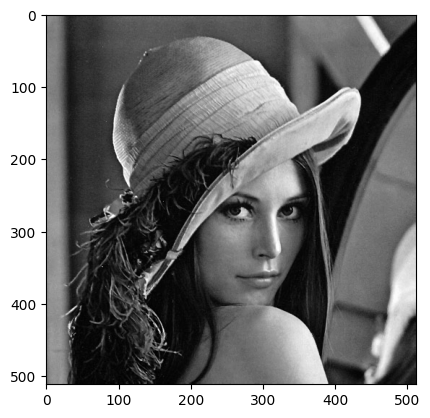

In [201]:
# Load the image
image = cv2.imread('lena.png',0)
print(image.shape)
plt.imshow(image,cmap='gray')

In [202]:

# Specify the padding
# Use numpy pad function to pad the image
padded_image = np.pad(image, ((1,1),(1,1)))

padded_image.shape

(514, 514)

### 2.3 Convolution

In [203]:
#Con_kernel = [1,1,1,1,1,1,1,1,1]
Con_kernel = np.ones(shape=9)

#Con_kernel = [1,2,1,2,4,2,1,2,1]

#Con_kernel = [0,-1,0,-1,5,-1,0,-1,0]

#Con_kernel = [-1,-1,-1,-1,9,-1,-1,-1,-1] 

#Con_kernel = [1,-2,1,-2,5,-2,1,-2,1] 

#Con_kernel = [-1,0,-1,0,4,0,-1,0,-1]

#Con_kernel = [-1,-1,-1,-1,8,-1,-1,-1,-1]

#Con_kernel = [-1,0,1,-2,0,2,-1,0,1]

#Con_kernel = [1,2,1,0,0,0,-1,-2,-1]

#Con_kernel = [2,1,0,1,0,-1,0,-1,-2]

In [204]:
Con_kernel

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [205]:
pixel_list=[]
for i in range(1,513):
    for j in range(1,513):
        neighbourlist=[]
        
        neighbourlist.append(padded_image[i-1][j-1]*Con_kernel[0]) 
        neighbourlist.append(padded_image[i-1][j]*Con_kernel[1])    # first row
        neighbourlist.append(padded_image[i-1][j+1]*Con_kernel[2]) 
        
        neighbourlist.append(padded_image[i][j-1]*Con_kernel[3]) 
        neighbourlist.append(padded_image[i][j]*Con_kernel[4])      # second row
        neighbourlist.append(padded_image[i][j+1]*Con_kernel[5])

        neighbourlist.append(padded_image[i+1][j-1]*Con_kernel[6])
        neighbourlist.append(padded_image[i+1][j]*Con_kernel[7])    # third row 
        neighbourlist.append(padded_image[i+1][j+1]*Con_kernel[8])           

        pixel_list.append(sum(neighbourlist))

conv_image = np.array(pixel_list).reshape(512,512)

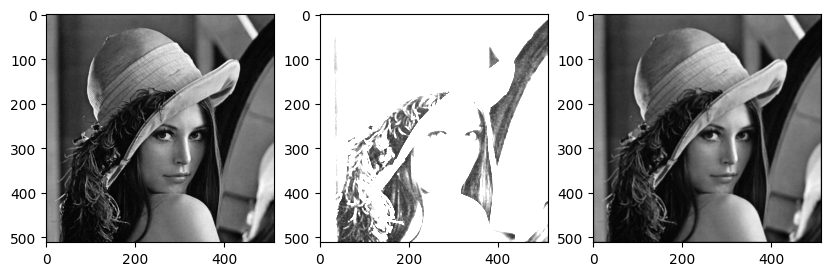

In [206]:
plt.figure(figsize=[10,10])
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.subplot(1,3,2)
plt.imshow(conv_image,cmap='gray',vmin=0,vmax=255)
plt.subplot(1,3,3)
plt.imshow(conv_image/9,cmap='gray',vmin=0,vmax=255)

### 2.4 Pooling

In [207]:
poolinglist = []
for i in range(0,512,2):
    for j in range(0,512,2):
        neighbourlist=[]
        neighbourlist.append(image[i][j])
        neighbourlist.append(image[i][j+1])
        neighbourlist.append(image[i+1][j])
        neighbourlist.append(image[i+1][j+1])

        poolinglist.append(max(neighbourlist))

poolingImage = np.array(poolinglist).reshape(256,256)


In [208]:
poolinglist = []
for i in range(0,256,2):
    for j in range(0,256,2):
        neighbourlist=[]
        neighbourlist.append(poolingImage[i][j])
        neighbourlist.append(poolingImage[i][j+1])
        neighbourlist.append(poolingImage[i+1][j])
        neighbourlist.append(poolingImage[i+1][j+1])
        

        poolinglist.append(max(neighbourlist))

poolingImage = np.array(poolinglist).reshape(128,128)

In [209]:
poolinglist = []
for i in range(0,128,2):
    for j in range(0,128,2):
        neighbourlist=[]
        neighbourlist.append(poolingImage[i][j])
        neighbourlist.append(poolingImage[i][j+1])
        neighbourlist.append(poolingImage[i+1][j])
        neighbourlist.append(poolingImage[i+1][j+1])
        

        poolinglist.append(max(neighbourlist))

poolingImage = np.array(poolinglist).reshape(64,64)

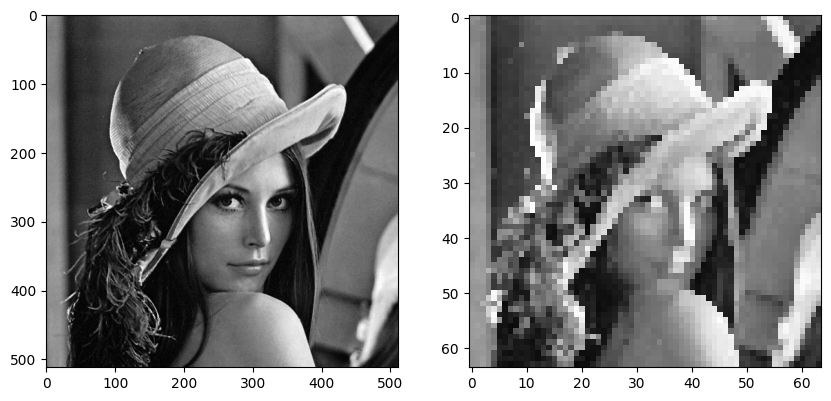

In [210]:
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.subplot(1,2,2)
plt.imshow(poolingImage,cmap='gray',vmin=0,vmax=255)

#### Exercise. Could you use the other method (average pooling) to implement the pooling operation?

In [211]:
import statistics


def pooling_AVG(size,img,target):
    poolinglist = []
    if size == target : 
        return img
    else : 
        for i in range(0,size,2):
            for j in range(0,size,2):
                neighbourlist=[]
                neighbourlist.append(img[i][j])
                neighbourlist.append(img[i][j+1])
                neighbourlist.append(img[i+1][j])
                neighbourlist.append(img[i+1][j+1])

                poolinglist.append(statistics.mean(neighbourlist))
        poolingImage = np.array(poolinglist).reshape(size//2,size//2)
        pooling_AVG(size//2,poolingImage,target)
    
poolingImage = pooling_AVG(size=512,img=image,target=32)

TypeError: Image data of dtype object cannot be converted to float

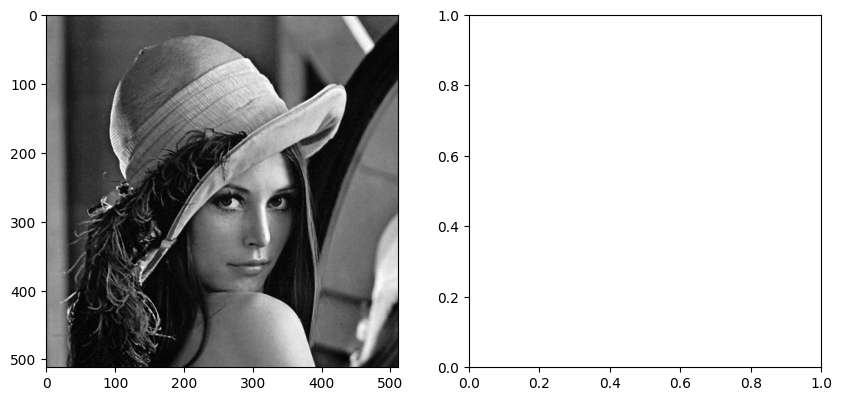

In [212]:
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.subplot(1,2,2)
plt.imshow(poolingImage,cmap='gray',vmin=0,vmax=255)

### 2.5 Fully-connection

In [ ]:
poolingImage.reshape(1,-1).shape

(1, 1024)